# Project 2: Online Shopper Behavior Prediction

By: Marde Cano

**Initial Objective:** To be able to predict whether a certain session will result to a purchase from the online store.

**DATASET SOURCE**: The dataset is publicly available at the UC Irvine Machine Learning Repository. [here](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset).

**BRIEF DESCRIPTION**: The dataset consists of feature vectors belonging to 12,330 (online) sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

The `'Revenue'` attribute will be my target values for this machine learning project. The project should be able to predict whether an online shopper (web user) will purchase a product from an online store, thus it is a *classification* problem.







In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Datasets/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# get the datasets info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# get the number of rows and columns
df.shape

(12330, 18)

The dataset consists of 10 numerical and 8 categorical attributes. In total, there are **18** features (columns) and **12,330** records (rows) available to use for our model.

I am not expecting any major issues to encounter in the process of data cleaning. Since the dataset came from a online store, most of the information is system (website) generated. Consistency of data will not be a big issue, especially the data collected came from an automated system like an online store. Outliers will be managed as this kind of data can affect our analysis and model performance later.

In [ ]:
# get the statistical information of our numerical features
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Data Cleaning

In [ ]:
# check for missing values and duplicates
print(f'Missing values: \n{df.isna().sum()}\n')
print(f'Duplicates: {df.duplicated().sum()} records')

Missing values: 
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Duplicates: 125 records


In [ ]:
# drop all duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(12205, 18)

In [ ]:
df['Revenue'].value_counts(normalize=True)

False    0.843671
True     0.156329
Name: Revenue, dtype: float64

## EDA

#### Univariate EDA

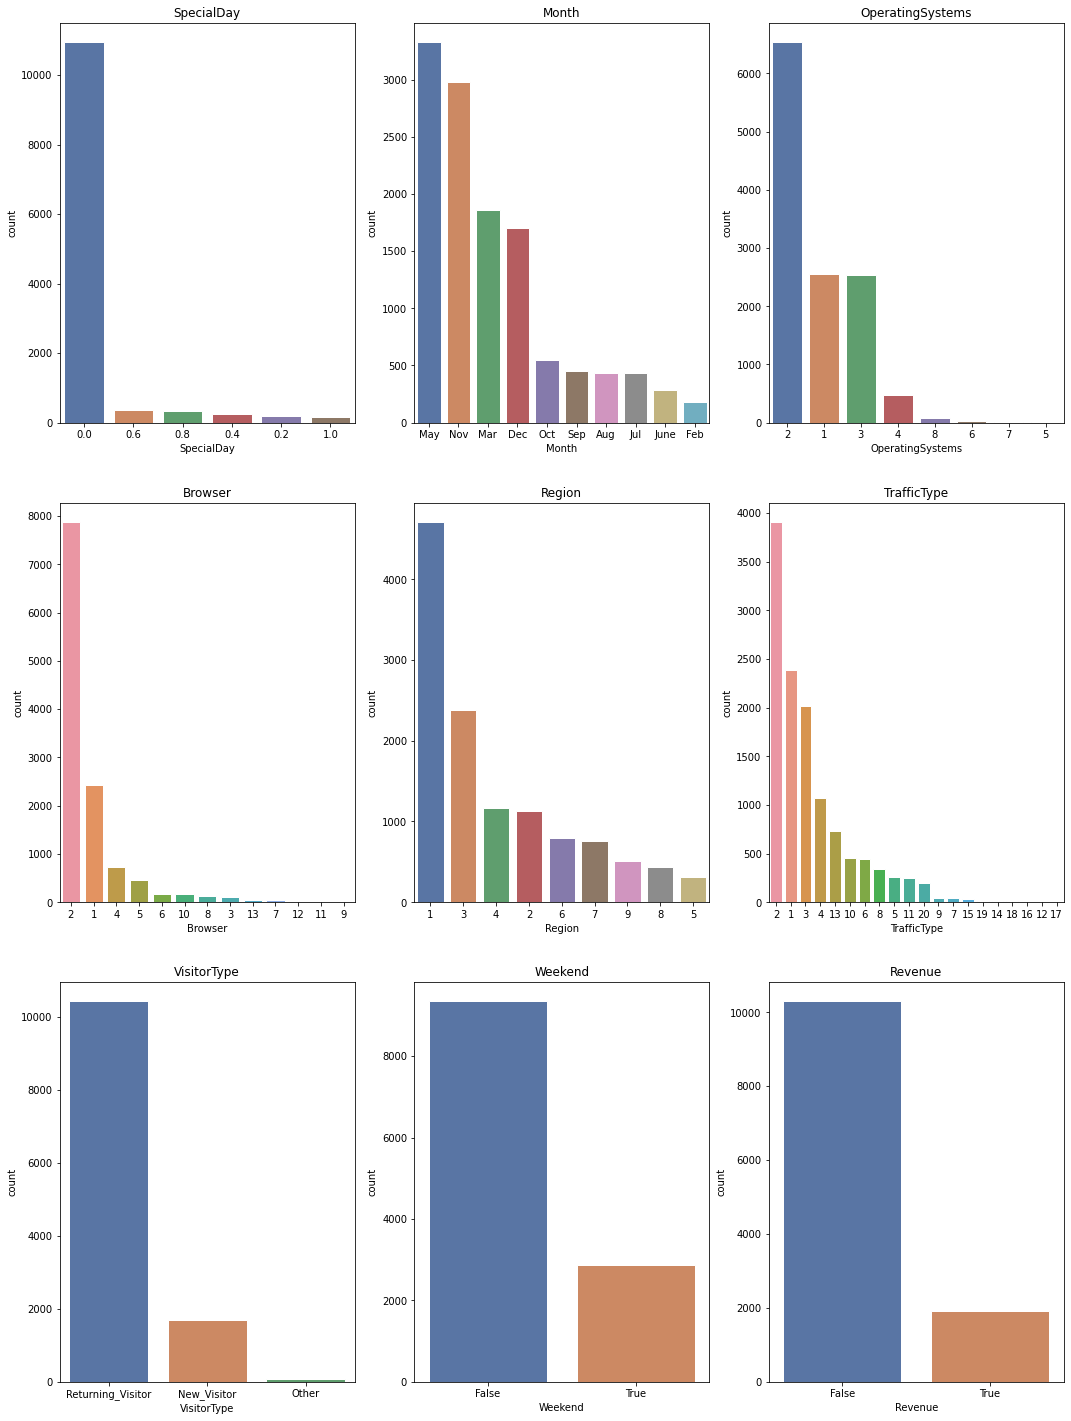

In [ ]:
# configure the subplots and  set figure size
fig, axes = plt.subplots(3, 3, figsize=(18, 25))
sns.set_theme(style="darkgrid")

# flatten the list
axes = axes.ravel()

# loop through some of the columns
for index,col in enumerate(df.columns[9:]):
  ax = sns.countplot(ax=axes[index], x=df[col], order=df[col].value_counts(ascending=False).index)
  axes[index].set_title(col)


 - The month of May tops the most number of web visitors followed by November and March, respectively.
 - There is a spike in numbers of visitors during special holidays.
 - Most web visitors uses Type 2 Operating system followed by Type 1 in second and Type 3 in third mostly used OS.
 - Type 2 browsers are widely used by the web visitors to access the online store.
 - Region 1 has the most number of users visit the website followed by Region 3 users.
 - There are more returning visitors of the website than the new visitors.
 - Most web users visit the website on weekdays.
 - Only 15.6% of the total web visitors ended up in buying from the online store.

#### Multi-variate EDA

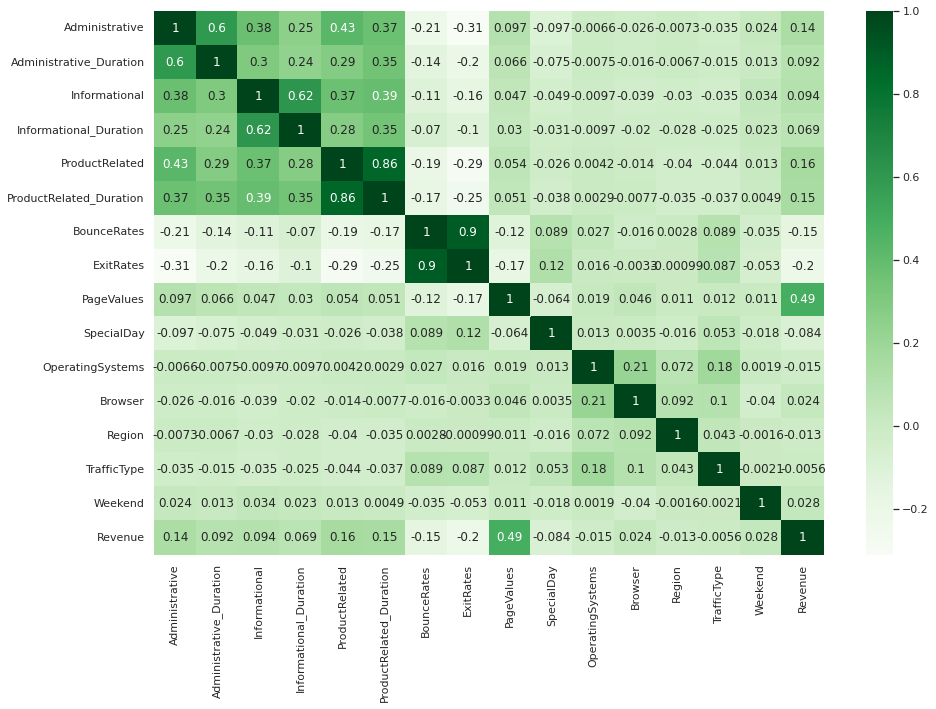

In [ ]:
# calculate correlation
corr = df.corr()

plt.figure(figsize=(15,10))
# display the heatmap
sns.heatmap(corr, annot=True, cmap='Greens')

It is very much obvious that the different types of pages visited by the visitor, namely, Administrative, Informational and Product Related, and the total time spent in each of these page categories have had high positive correlation to each other. 

However, for the other features, there are not much notable correlation except between Revenue and PageValues with 49% positive correlation.